In [ ]:
import gdown

url = "https://drive.google.com/uc?id=1bV7SN4v2KaX5IN3w6LbVMazs_ooeFfST&export=download"
output = "dataset.zip"  # Replace with your desired file name
gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1bV7SN4v2KaX5IN3w6LbVMazs_ooeFfST&export=download
From (redirected): https://drive.google.com/uc?id=1bV7SN4v2KaX5IN3w6LbVMazs_ooeFfST&export=download&confirm=t&uuid=af4cf307-ec1d-47bd-8759-a325be40d548
To: /content/dataset.zip
100%|██████████| 156M/156M [00:04<00:00, 37.3MB/s]


'dataset.zip'

In [ ]:
!unzip /content/dataset.zip

Step 1: Import Required Libraries

In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Step 2: Data Preprocessing Function

In [ ]:
def load_and_preprocess_data(training_path, testing_path, labels, image_size=224):
    X = []
    Y = []

    # Load training data
    for label in labels:
        folder_path = os.path.join(training_path, label)
        for img_name in os.listdir(folder_path):
            img = cv2.imread(os.path.join(folder_path, img_name))
            img = cv2.resize(img, (image_size, image_size))
            X.append(img)
            Y.append(labels.index(label))  # Map label to numeric value

    # Load testing data
    for label in labels:
        folder_path = os.path.join(testing_path, label)
        for img_name in os.listdir(folder_path):
            img = cv2.imread(os.path.join(folder_path, img_name))
            img = cv2.resize(img, (image_size, image_size))
            X.append(img)
            Y.append(labels.index(label))  # Map label to numeric value

    # Convert to NumPy arrays
    X = np.array(X)
    Y = np.array(Y)

    # Normalize pixel values
    X = preprocess_input(X)  # Preprocess using VGG16's preprocessing

    return X, Y

Step 3: Prepare Data

In [ ]:
def prepare_data(training_path, testing_path, labels, image_size=224, test_size=0.2):
    X, Y = load_and_preprocess_data(training_path, testing_path, labels, image_size)

    # Split the dataset into training and validation sets
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=test_size, random_state=42)

    # One-hot encode the labels
    num_classes = len(labels)
    Y_train = to_categorical(Y_train, num_classes=num_classes)
    Y_val = to_categorical(Y_val, num_classes=num_classes)

    return X_train, X_val, Y_train, Y_val, num_classes

Step 4: Build the Model

In [ ]:
def build_vgg16_model(input_shape, num_classes):
    # Load the VGG16 model without the top layer
    base_model = VGG16(weights='imagenet', include_top=False, input_shape=input_shape)

    # Build the custom model
    model = Sequential([
        base_model,
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')  # Output layer
    ])

    # Freeze the base model layers
    for layer in base_model.layers:
        layer.trainable = False

    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

Step 5: Train the Model

In [ ]:
def train_model(model, X_train, Y_train, X_val, Y_val, epochs=10, batch_size=32):
    history = model.fit(
        X_train, Y_train,
        validation_data=(X_val, Y_val),
        epochs=epochs,
        batch_size=batch_size
    )
    return model, history


Step 6: Evaluate the Model

In [ ]:
def evaluate_model(model, X_val, Y_val):
    loss, accuracy = model.evaluate(X_val, Y_val)
    print(f"Validation Loss: {loss}, Validation Accuracy: {accuracy}")
    return loss, accuracy


Step 7: Plot Training History

In [ ]:
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss Over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()

Step 8: Main Pipeline

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 53s 235ms/step - accuracy: 0.7273 - loss: 4.8846 - val_accuracy: 0.8769 - val_loss: 0.3610
Epoch 2/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 15s 84ms/step - accuracy: 0.8717 - loss: 0.3861 - val_accuracy: 0.9103 - val_loss: 0.2788
Epoch 3/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 21s 86ms/step - accuracy: 0.8914 - loss: 0.3225 - val_accuracy: 0.9068 - val_loss: 0.3077
Epoch 4/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 23s 99ms/step - accuracy: 0.9023 - loss: 0.2985 - val_accuracy: 0.9174 - val_loss: 0.2545
Epoch 5/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 15s 87ms/step - accuracy: 0.9037 - loss: 0.2646 - val_accuracy: 0.9267 - val_loss: 0.2165
Epoch 6/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 22s 98ms/step - accuracy: 0.9233 - loss: 0.2186 - val_accuracy: 0.9310 - val_loss: 0.2189
Epoch 7/10
176/176 ━━━━━━━━━━━━━━━━━━━━ 18s 85ms/step - accuracy: 0.9406 - loss: 0.1815 - val_accuracy: 0.9238 - val_loss: 0.2535
Epoch 8/10
176/176 ━━━━━━━━━━━━━━━━━━━

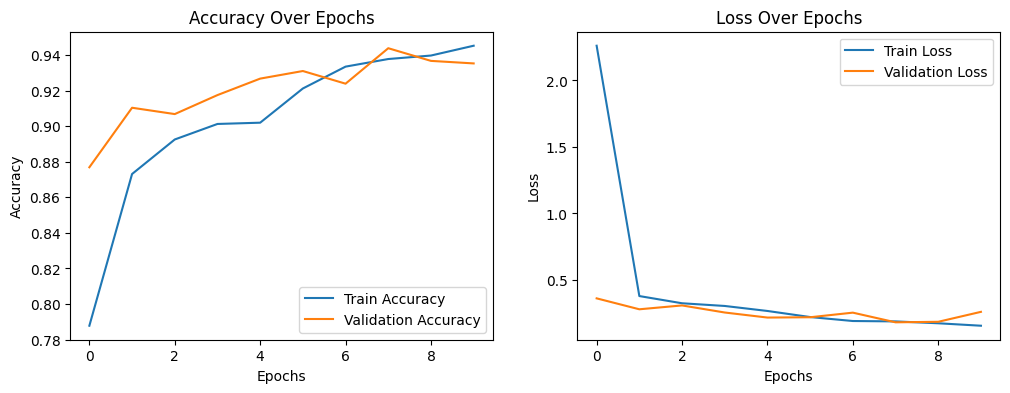

In [ ]:
if __name__ == "__main__":
    # Define paths and labels
    training_path = "/content/Training"
    testing_path = "/content/Testing"
    labels = ['glioma', 'meningioma', 'notumor', 'pituitary']
    image_size = 150

    # Prepare data
    X_train, X_val, Y_train, Y_val, num_classes = prepare_data(training_path, testing_path, labels, image_size)

    # Build the model
    input_shape = (image_size, image_size, 3)
    model = build_vgg16_model(input_shape, num_classes)

    # Train the model
    model, history = train_model(model, X_train, Y_train, X_val, Y_val, epochs=10, batch_size=32)

    # Evaluate the model
    evaluate_model(model, X_val, Y_val)

    # Plot training history
    plot_training_history(history)


In [56]:
model.save('braintumor_vgg.h5')